<a href="https://colab.research.google.com/github/JoJa171199/INESDI_Data-Science_ML_IA/blob/main/%5B00%5D%20-%20Workshops/Workshop_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Workshop Final — Machine Learning Integrado (ENUNCIADO)



## Contexto y objetivo

Este workshop plantea un **caso de negocio en retail**: una cadena de tiendas quiere entender mejor a sus clientes y optimizar sus decisiones comerciales. Para ello se pondrá en práctica todo el ciclo de Machine Learning.

**Dataset propuesto (opcional):** [Sample - Superstore (Kaggle)](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)  

[Dataset en GitHub (no requiere autenticación)](https://raw.githubusercontent.com/dtoralg/INESDI_Data-Science_ML_IA/main/%5B00%5D%20-%20Workshops/Sample%20-%20Superstore.csv)

- 9994 filas de datos de pedidos de una cadena de tiendas. Encoding latin1.
- Permite trabajar con problemas de **clasificación** (ej. clientes rentables vs. no rentables), **regresión** (predicción de ventas o beneficio) y **clustering** (segmentación de clientes).  

**Columnas principales:**  
- Order ID / Customer ID: identificadores únicos de pedido y cliente  
- Order Date / Ship Mode: fecha y modo de envío  
- Segment: tipo de cliente (Consumer, Corporate, Home Office)  
- Region / State / City: localización geográfica  
- Category / Sub-Category: categoría de producto  
- Sales: importe de la venta  
- Quantity: número de unidades vendidas  
- Discount: descuento aplicado (%)  
- Profit: beneficio asociado al pedido  

**Problema de negocio (ejemplo):**  
“Queremos identificar qué clientes tienen mayor probabilidad de generar pérdidas, predecir su volumen de compra y segmentarlos para diseñar campañas de marketing más eficaces.”

**Importante:**  
- Este dataset es una **base común** para quienes lo deseen.  
- Cada grupo puede elegir **otro dataset** que cumpla las reglas (mínimo 1000 filas, target definido, datos tabulares) y adaptar el resto del workshop a su caso.


## Pregunta de negocio

Redacta aquí en una frase la pregunta que guiará vuestro trabajo.


## Bloque común — EDA y preparación de datos

1. Descripción del dataset y justificación de su elección  
2. Identificación de variables, tipos, nulos y duplicados  
3. Limpieza de datos  
4. Creación de nuevas variables (feature engineering)  
5. Transformaciones: encoding y escalado  
6. Gráficos de exploración (distribuciones, correlaciones, top-K, boxplots)


# Identificación de variables, tipos, nulos y duplicados

In [1]:
# Código de EDA y preparación

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)  # mostrar todas las columnas
print('Entorno preparado.')

Entorno preparado.


In [2]:
url = 'https://raw.githubusercontent.com/dtoralg/INESDI_Data-Science_ML_IA/main/%5B00%5D%20-%20Workshops/Sample%20-%20Superstore.csv'
df = pd.read_csv(url, encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
#Descripción de filas, columnas y tipo de datos

print('Filas y columnas:', df.shape)
print('\nTipos de datos:')
print(df.dtypes)
print('\n \n ------------------- \n \n')

Filas y columnas: (9994, 21)

Tipos de datos:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

 
 ------------------- 
 



In [4]:
#Descripción variables de regresión

df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
#Descripción variables de clasificación

df.describe(include = 'object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [27]:
df[df_Ship Mode']

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [6]:
#Valores nulos

df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


* No hay valores nulos

In [7]:
#Valores Duplicados

df.duplicated().sum()

np.int64(0)

* No hay valores duplicados

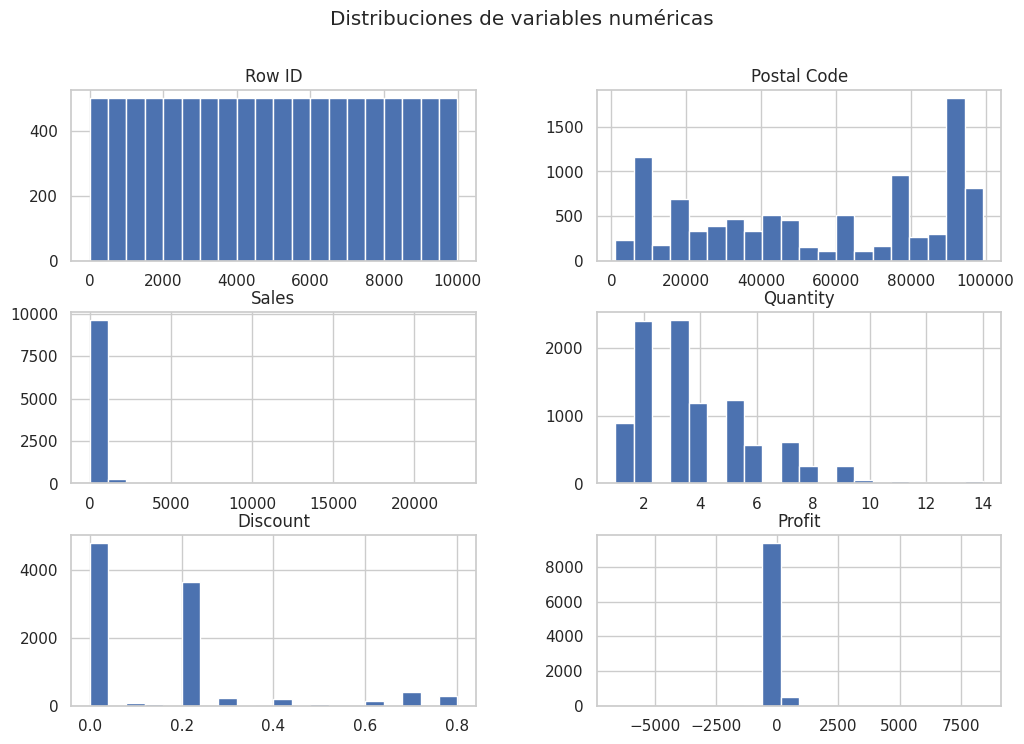

In [8]:
#outliers
df.select_dtypes(include='number').hist(bins=20, figsize=(12,8))
plt.suptitle('Distribuciones de variables numéricas')
plt.show()

In [9]:
#borrar columnas con ID, que no aportan valor al modelo

df_idnt = df.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID'], axis=1)

In [10]:
df_idnt.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


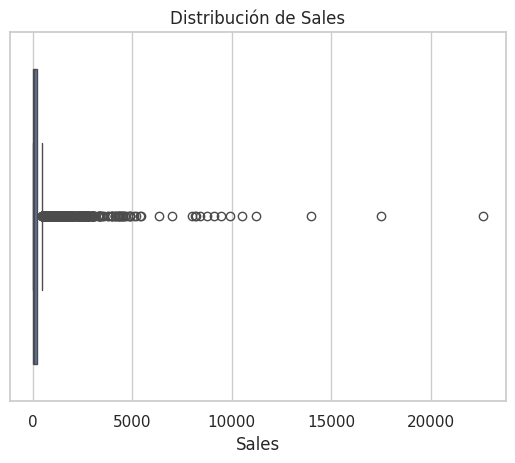

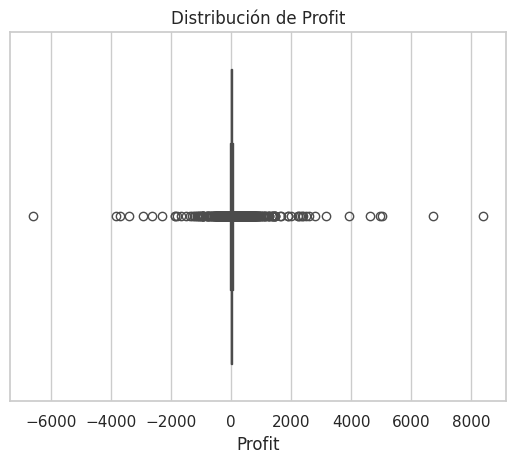

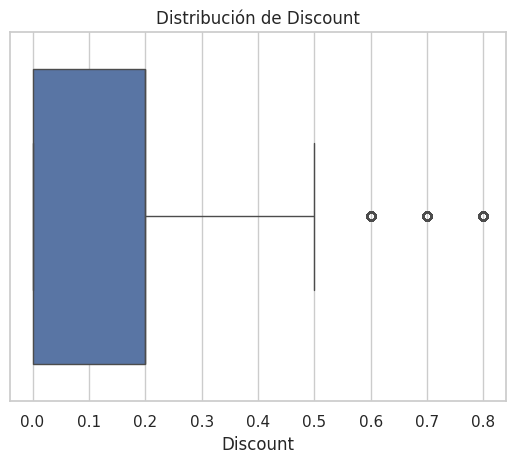

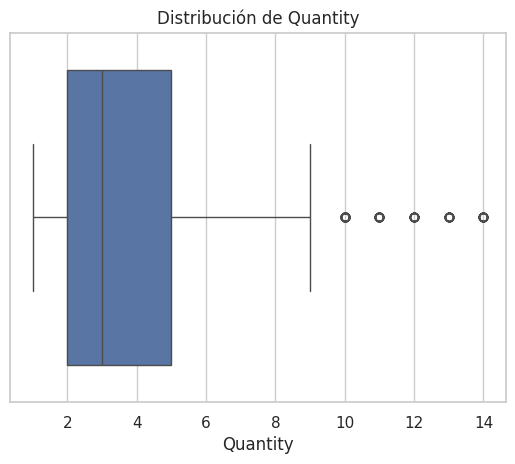

In [21]:
# Boxplots para outliers
for col in ['Sales', 'Profit', 'Discount', 'Quantity']:
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.show()

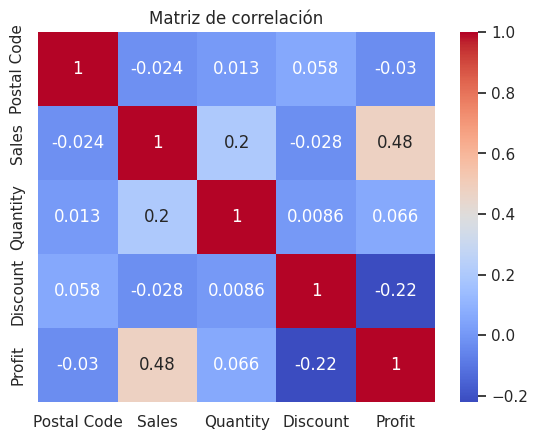

In [23]:
sns.heatmap(df_idnt.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [24]:
corr = df_idnt.corr(numeric_only=True).abs()
corr[corr !=1].max().sort_values(ascending=False)

,0
Sales,0.479064
Profit,0.479064
Discount,0.219487
Quantity,0.200795
Postal Code,0.058443


In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


vars_numericas = df.select_dtypes(include= ['int']).columns

# Aplicamos Min-Max Scaling a las variables numérica
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[vars_numericas] = scaler_minmax.fit_transform(df[vars_numericas])
df_minmax[vars_numericas].describe()

,Row ID,Postal Code,Quantity
count,9994.000000,9994.000000,9994.000000
mean,0.500000,0.551087,0.214583
std,0.288718,0.326311,0.171162
min,0.000000,0.000000,0.000000
25%,0.250000,0.225756,0.076923
50%,0.500000,0.563708,0.153846
75%,0.750000,0.905425,0.307692
max,1.000000,1.000000,1.000000


In [30]:
#Preparación para regresión lineal

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
sns.set(style='whitegrid')

In [39]:
X = df_idnt[['Sales', 'Discount', 'Profit']]
y = df_idnt['Quantity']
X.head()

,Sales,Discount,Profit
0,261.9600,0.00,41.9136
1,731.9400,0.00,219.5820
2,14.6200,0.00,6.8714
3,957.5775,0.45,-383.0310
4,22.3680,0.20,2.5164


In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Squared Error (MSE): 5.04
Root Mean Squared Error (RMSE): 2.24
R-squared (R²): -0.00


In [40]:
#Definir variables para Regresión lineal que tiene como variables X (explicativas) a Sales, Discount y Profit y como 'y' a Quantity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#entrenar al modelo con las variables divididas
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

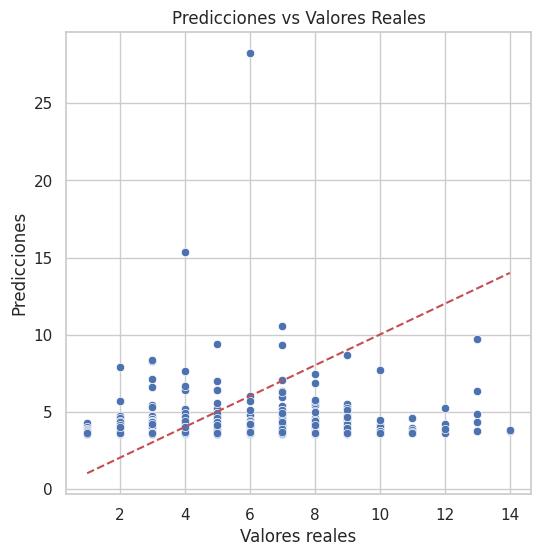

In [43]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

#Creación de nuevas variables (feature engineering)


## Ruta 1 — Clasificación

1. Selección del target categórico  
2. Entrenamiento de modelos base
3. Entrenamiento de modelos avanzados
4. Evaluación con métricas (Accuracy, Precision, Recall, F1, ROC-AUC)  
5. Validación y ajuste de hiperparámetros  
6. Breve análisis de explicabilidad
7. Gráficas necesarias en cada paso


In [11]:
# Código de clasificación


## Ruta 2 — Regresión

1. Selección del target numérico  
2. Entrenamiento de modelos base y avanzados  
3. Evaluación con métricas (MAE, RMSE, R²)  
4. Validación y ajuste de hiperparámetros  
5. Breve análisis de explicabilidad
6. Gráficas necesarias en cada paso


In [12]:
# Código de regresión


## Ruta 3 — No supervisados

1. Aplicación de clustering (K-Means, DBSCAN u otros)  
2. Evaluación con métricas (Silhouette, índices adicionales)  
3. Visualización de clusters en 2D con PCA  
4. Identificación de anomalías con LOF  
5. Perfilado de clusters y discusión de aplicaciones de negocio
6. Gráficas necesarias en cada paso


In [13]:
# Código de clustering y no supervisados


## Comparativa de resultados y recomendación final

- Resumen de métricas por ruta y modelo  
- Comparación de fortalezas y limitaciones  
- Recomendación final orientada a negocio


In [14]:
# Tabla comparativa y recomendación


## Preparación de la presentación

Cada grupo dispondrá de 3–4 minutos para exponer:  
1. Dataset y problema de negocio elegido  
2. Caminos explorados y modelos aplicados  
3. Resultados clave y métricas  
4. Recomendación final


In [15]:
# Puntos clave de la presentación


## Checklist final

- [ ] Notebook ejecuta de principio a fin  
- [ ] Dos rutas completas como mínimo  
- [ ] Visualizaciones incluidas y comentadas  
- [ ] Recomendación final clara y accionable  
- [ ] Descarga y sube este ipynb a la carpeta de feedback para recibir comentarios


# Task
Apply the Random Forest model to the dataframe 'df' step by step, including EDA, model initialization, training, prediction, evaluation, and optimization.

## Eda and data preparation

### Subtask:
Continue with the Exploratory Data Analysis and data preparation steps, including handling categorical features and potential outliers, and creating new features if necessary.


**Reasoning**:
Examine the unique values and their counts in categorical columns of `df_idnt` to assess cardinality and inform encoding strategies.



In [44]:
for col in df_idnt.select_dtypes(include='object').columns:
    print(f'Column: {col}')
    print(df_idnt[col].value_counts())
    print('\n' + '-'*30 + '\n')

Column: Order Date
Order Date
9/5/2016      38
9/2/2017      36
11/10/2016    35
12/1/2017     34
12/2/2017     34
              ..
1/28/2016      1
11/9/2016      1
6/3/2016       1
4/12/2015      1
1/21/2014      1
Name: count, Length: 1237, dtype: int64

------------------------------

Column: Ship Date
Ship Date
12/16/2015    35
9/26/2017     34
11/21/2017    32
12/6/2017     32
9/6/2017      30
              ..
2/19/2016      1
2/1/2015       1
8/25/2016      1
1/27/2014      1
1/23/2014      1
Name: count, Length: 1334, dtype: int64

------------------------------

Column: Ship Mode
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

------------------------------

Column: Segment
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

------------------------------

Column: Country
Country
United States    9994
Name: count, dtype: int64

---------------------------

**Reasoning**:
Based on the value counts, 'Order Date', 'Ship Date', 'City', and 'Product Name' have high cardinality. 'Country' has only one unique value and 'Postal Code' is a numerical feature. I will drop 'Country' and 'Product Name' as they are not useful for the model, and I will convert 'Order Date' and 'Ship Date' to datetime objects and extract new features. I will also consider handling outliers in the numerical features using capping and remove the 'Postal Code' column since it has low correlation with the target variable and high cardinality.



In [45]:
# Drop columns with high cardinality and low relevance
df_processed = df_idnt.drop(['Country', 'Product Name', 'Postal Code'], axis=1)

# Convert date columns to datetime and extract new features
df_processed['Order Date'] = pd.to_datetime(df_processed['Order Date'])
df_processed['Ship Date'] = pd.to_datetime(df_processed['Ship Date'])
df_processed['Order Year'] = df_processed['Order Date'].dt.year
df_processed['Order Month'] = df_processed['Order Date'].dt.month
df_processed['Order Day'] = df_processed['Order Date'].dt.day
df_processed['Ship Duration'] = (df_processed['Ship Date'] - df_processed['Order Date']).dt.days

# Capping outliers in numerical features
for col in ['Sales', 'Profit', 'Discount', 'Quantity']:
    q1 = df_processed[col].quantile(0.25)
    q3 = df_processed[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)

df_processed.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Ship Duration
0,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2.0,0.00,41.913600,2016,11,8,3
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,498.930,3.0,0.00,70.816875,2016,11,8,3
2,2016-06-12,2016-06-16,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620,2.0,0.00,6.871400,2016,6,12,4
3,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,498.930,5.0,0.45,-39.724125,2015,10,11,7
4,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2.0,0.20,2.516400,2015,10,11,7


**Reasoning**:
Continue with data preparation by handling categorical features. Since 'City' has high cardinality, I will use target encoding. For other categorical features with lower cardinality, I will use one-hot encoding.



In [46]:
# Target encoding for 'City'
city_mean_profit = df_processed.groupby('City')['Profit'].mean()
df_processed['City_Encoded'] = df_processed['City'].map(city_mean_profit)

# One-hot encode other categorical features
categorical_cols = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category']
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

df_processed.head()

,Order Date,Ship Date,City,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Ship Duration,City_Encoded,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,2016-11-08,2016-11-11,Henderson,261.960,2.0,0.00,41.913600,2016,11,8,3,32.475950,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2016-11-08,2016-11-11,Henderson,498.930,3.0,0.00,70.816875,2016,11,8,3,32.475950,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,2016-06-12,2016-06-16,Los Angeles,14.620,2.0,0.00,6.871400,2016,6,12,4,22.460779,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,2015-10-11,2015-10-18,Fort Lauderdale,498.930,5.0,0.45,-39.724125,2015,10,11,7,4.644478,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,2015-10-11,2015-10-18,Fort Lauderdale,22.368,2.0,0.20,2.516400,2015,10,11,7,4.644478,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,F

## Feature and target selection

### Subtask:
Define the features (X) and the target variable (y) for the Random Forest model.


**Reasoning**:
Define the features (X) and the target variable (y) for the Random Forest model by selecting appropriate columns from the processed DataFrame.



In [47]:
# Define the target variable (y)
y = df_processed['Profit']

# Define the features (X) by dropping the target and original date columns
X = df_processed.drop(['Profit', 'Order Date', 'Ship Date'], axis=1)

# Display the first few rows of X and y
print("Features (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())

Features (X):


,City,Sales,Quantity,Discount,Order Year,Order Month,Order Day,Ship Duration,City_Encoded,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,Henderson,261.960,2.0,0.00,2016,11,8,3,32.475950,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,Henderson,498.930,3.0,0.00,2016,11,8,3,32.475950,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,Los Angeles,14.620,2.0,0.00,2016,6,12,4,22.460779,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,Fort Lauderdale,498.930,5.0,0.45,2015,10,11,7,4.644478,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,Fort Lauderdale,22.368,2.0,0.20,2015,10,11,7,4.644478,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False



Target (y):


,Profit
0,41.913600
1,70.816875
2,6.871400
3,-39.724125
4,2.516400


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets for model training and evaluation.



In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7995, 83)
Shape of X_test: (1999, 83)
Shape of y_train: (7995,)
Shape of y_test: (1999,)


## Model initialization

### Subtask:
Initialize the Random Forest model.


**Reasoning**:
Import the necessary class and initialize the Random Forest model.



In [49]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

## Model training

### Subtask:
Train the Random Forest model using the training data.


**Reasoning**:
Fit the initialized Random Forest model to the training data.



In [50]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Houston'

**Reasoning**:
The error indicates that there are still non-numeric columns in the training data that need to be handled. I need to identify these columns and apply appropriate encoding.



In [52]:
# Identify non-numeric columns in X_train
non_numeric_cols = X_train.select_dtypes(include='object').columns
print("Non-numeric columns in X_train:", non_numeric_cols)

# Apply one-hot encoding to the remaining non-numeric column 'City'
X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

# Align columns after one-hot encoding - essential for consistent feature sets
train_cols = X_train.columns
test_cols = X_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0
X_test = X_test[train_cols]


# Fit the initialized Random Forest model to the training data
model.fit(X_train, y_train)

Non-numeric columns in X_train: Index([], dtype='object')


RandomForestRegressor(random_state=42)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_rf = model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Model Performance:')
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'R-squared (R²): {r2_rf:.2f}')

Random Forest Model Performance:
Mean Absolute Error (MAE): 5.43
Mean Squared Error (MSE): 147.07
Root Mean Squared Error (RMSE): 12.13
R-squared (R²): 0.83


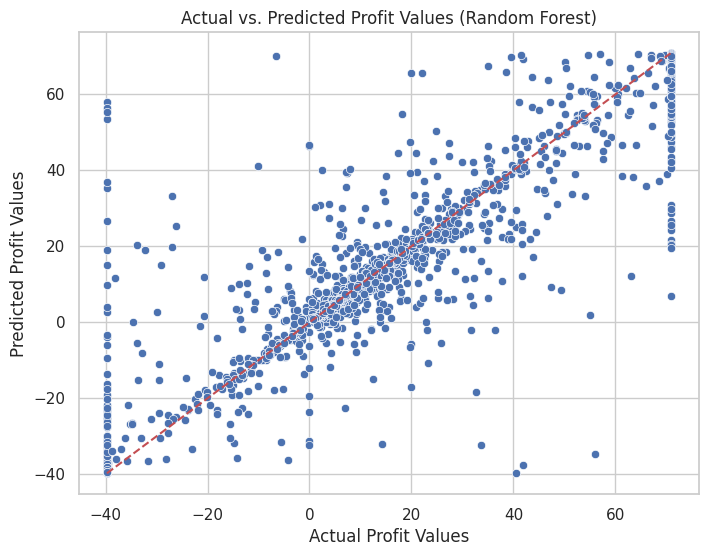

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Profit Values')
plt.ylabel('Predicted Profit Values')
plt.title('Actual vs. Predicted Profit Values (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Add a diagonal line
plt.show()

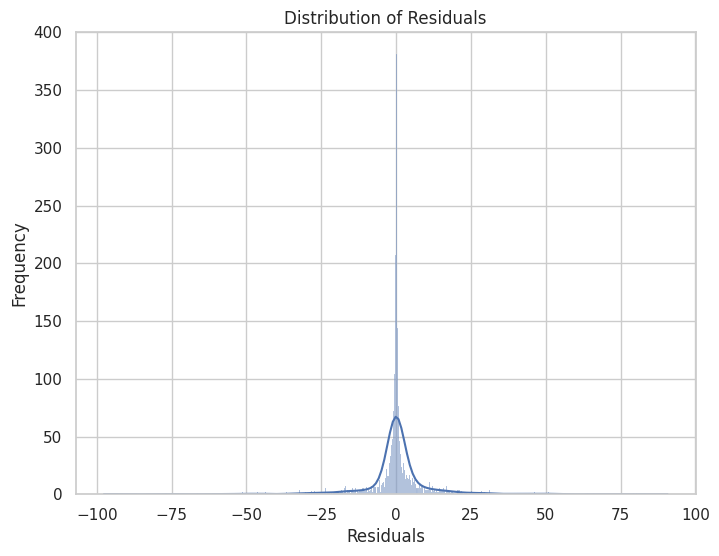

In [55]:
# Residuals Histogram
residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

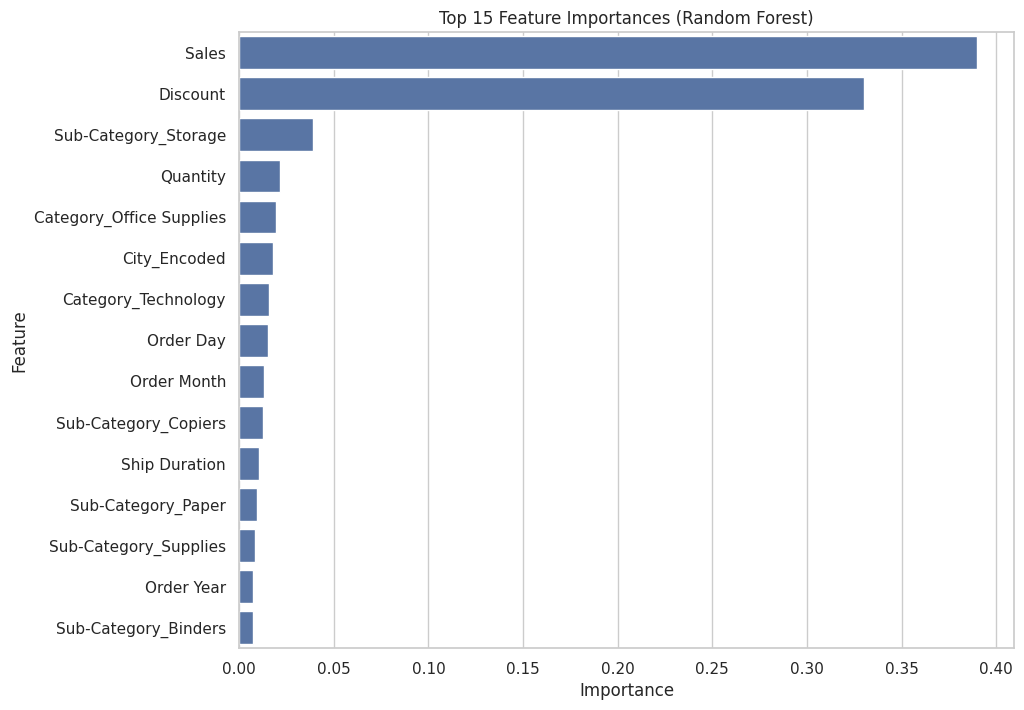

In [56]:
# Feature Importances Plot
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.head(15), y=feature_importances.head(15).index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.show()

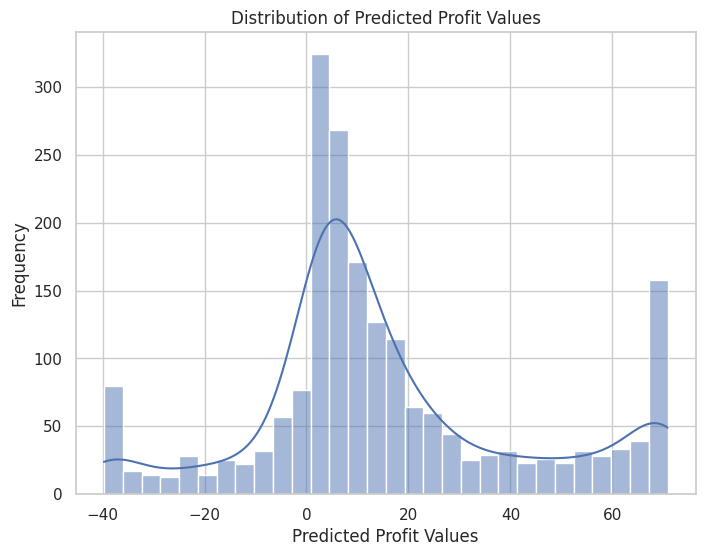

In [57]:
# Distribution of Predicted Values
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_rf, kde=True)
plt.xlabel('Predicted Profit Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Profit Values')
plt.show()